# Q1.Decision Based Diffusion[50 Points]

## 0-A. Set-up[-2 if author function is not called]

In [1]:
def author(gt_username = 'pbutler33'):
  print("This assignment is submitted by {0}.".format(gt_username))
#Add your GT_UserName below and uncomment the line.
author()

This assignment is submitted by pbutler33.


In [2]:
#Installations
!pip install snap-stanford

In [3]:
import snap
import matplotlib.pyplot as plt
import numpy as np


# Setup
num_voters = 10000
decision_period = 10

## 0-B. Utility Functions[25 Points]

In [4]:
#Utility functions:
def read_graph(path):
    """
    Function to read the .txt file to load the undirected graph.
    
    Args: path: path to edge list file
    Returns: Graph: loaded Graph(snap.PUNGraph)

    """
    Graph = None
    ### Add your code here.[1 Point]
    Graph = snap.LoadEdgeList(snap.PUNGraph, path)
    ######################

    return Graph

def get_neighbors(graph,nodeId):
    """
    Function to get all neighbours of a node in a given graph.

    Arg: graph:  snap.PUNGraph object representing an undirected graph
         nodeId: An integer in the range of (0,num_voters-1)(inclusive)
    Returns: neighbours : List of neighbouring nodes

    """
    neighbours = None
    ### Add your code here.[2 Points]
    neighbours = list(graph.GetNI(nodeId).GetOutEdges())
    ######################
    return neighbours

def get_vote_count(nodeset, pref, letter):
    """
    Function to get the vote counts for a particular candidate(letter) given a nodeset and their preferences

    Args: nodeset: Set of Graph Nodes
         pref: preference mapping
         letter: Candidate letter
    Returns: vote_count : Vote count for the given candidate

    """
    vote_count = None
    ### Add your code here.[1 Point]
    vote_count = len([i for i in nodeset if pref[i]==letter])

    ######################
    return vote_count

def winner(pref):
    """
    Function to get the winner of election process.(Please use the appropriate utitlity function(s) as required.)

    Args: pref: Dictionary object mapping node ids to the voting preferences
    Returns: winner: Winning candidate character(char)
             margin: Margin of victory or loss for A(i.e. margin = a_count - b_count)

    Note: Please note that for margin calculation we're NOT taking the absolute value.
    """
    winner = None
    margin = None
    ### Add your code here.[3 Points]
    a_count = get_vote_count(pref.keys(), pref, 'A')
    b_count = get_vote_count(pref.keys(), pref, 'B')
    margin = a_count - b_count
    if margin >= 0:
        winner = 'A'
    else:
        winner = 'B'
    
    ######################
    return winner, margin

def sort_nodes_by_popularity(graph):
    """
    Function to sort all nodes of the given graph in descending order of their popularity(degree).

    Args: graph: snap.PUNGraph object representing an undirected graph
    Returns: ids: NodeIds list sorted based on their degrees(Descending order)
             degrees: Degrees corresponding to the above node Ids.(Should have one to one correspondence with the above ids list)

    Example output(dummy): ids: [2,1,3,0]
                           degrees: [3,2,2,0] Note that both node 1 and 3 have the same degree, so the node with the lowest id
                                              comes first.(Please refer to the question for details)

    """
    degrees = []
    ids = []
    ### Add your code here.[5 Points]
    for i in graph.Nodes():
        ids.append(i.GetId())
        degrees.append(i.GetOutDeg())
    
    arr = np.array([z for z in zip(ids, degrees)], dtype = [('id', 'int32'), ('deg', 'int32')])
    arr['deg'] *= -1
    idx = np.argsort(arr, order=('deg', 'id'))
    
    degrees = list(np.array(degrees)[idx])
    ids = list(np.array(ids)[idx])
    ######################
    for i in range(1, len(degrees)):
        assert(degrees[i] <= degrees[i-1])

    return ids, degrees

def initial_voting_state(Graph):
    """
    Function to initialize the voting preferences.

    Args: Graph: snap.PUNGraph object representing an undirected graph
    Returns: voter_prefs: Dictionary mapping node IDs to initial voter preference
            ('A', 'B', or 'U')
    Note: 'U' denotes undecided voting preference.

    Example: Some random key-value pairs of the dict are
             {0 : 'A', 24 : 'B', 118 : 'U'}.
    """
    voter_prefs = {}

    ### Add your code here.[4 Points]
    for i in Graph.Nodes():
        nid = i.GetId()
        if nid%10 in [0, 1, 2, 3]:
            voter_prefs[nid] = 'A'
        elif nid%10 in [4, 5, 6, 7]:
            voter_prefs[nid] = 'B'
        else:
            voter_prefs[nid] = 'U'

    ######################
    assert(len(voter_prefs) == num_voters)
    return voter_prefs

def iterate_voting(Graph, init_pref):
    """
    Function to perform the 10-day decision process.

    Args: Graph: snap.PUNGraph object representing an undirected graph
         init_pref: Dictionary object containing the initial voting
                    preferences (before any iteration of the decision
                    process)
    Returns: curr_pref: Dictionary containing the voting preferences (mapping node IDs to
                        'A','B' or 'U') after the decision process.

    Hint: Use global variables num_voters and decision_period to iterate.
    """
    curr_pref = init_pref.copy()
    curr_alternating_vote = 'A'

    ### Add your code here.[7 Points]
    undecided = [i for i in init_pref.keys() if init_pref[i] == 'U'] # list of voters who may change their minds
    undecided.sort()
    for d in range(decision_period):
        for u in undecided:
            friends = get_neighbors(Graph, u)
            a_count = get_vote_count(friends, curr_pref, 'A')
            b_count = get_vote_count(friends, curr_pref, 'B')
            if a_count > b_count:
                curr_pref[u] = 'A'
            elif b_count > a_count:
                curr_pref[u] = 'B'
            else:
                curr_pref[u] = curr_alternating_vote
                if curr_alternating_vote == 'A':
                    curr_alternating_vote = 'B'
                elif curr_alternating_vote == 'B':
                    curr_alternating_vote = 'A'
            
    ######################
    return curr_pref

def sim_election(Graph):
    """
    Function to simulate the election process, takes the Graph as input and
    gives the final voting preferences (dictionary) as output.

    Args: Graph: snap.PUNGraph object representing an undirected graph
    Returns: pref: Dictionary containing the voting preferences (mapping node IDs to
                        'A','B' or 'U') after the decision process.
    """
    ### Add your code here.[2 Points]
    init_pref = initial_voting_state(Graph)
    pref = iterate_voting(Graph, init_pref)
    ######################
    

    return pref

## 1. Basic Setup and Simulation[3 Points]

### 1-A. Utility Functions

For this part you should complete the following utility functions:


1.   read_graph
2.   get_neighbors
3.   get_vote_count
4.   winner
4.   initial_voting_state
5.   iterate_voting
6.   sim_election



### 1-B. Part 1 Simulation[3 Points]

In [5]:
#Q1
def Q1():
    """
    Function to carry out part 1.(Please use the appropriate utitlity function(s) as required.)
    You should be carrying out the following steps:
    1) Load the graphs.
    2) Simulate the election and find final preferences.
    3) Get the winner for both the networks.
    """

    print ("\nQ1:")
    winners = [] #Stores the Winners of the election for both graphs
    ### Add your code here.
    graph1 = read_graph('graph1.txt')
    graph2 = read_graph('graph2.txt')
    pref1 = sim_election(graph1)
    pref2 = sim_election(graph2)
    winners.append(winner(pref1))
    winners.append(winner(pref2))
    ########################

    for i in range(2):
        print ("In graph {0}, candidate {1} wins by {2} votes".format(
                i+1, winners[i][0], abs(winners[i][1])))

## 2. TV Advertising [10 Points]

In [6]:
#Q2
def Q2sim(Graph, k):
    """
    Function to simulate the effect of advertising.(Please use the appropriate utitlity function(s) as required.)
    Args: Graph: snap.PUNGraph object representing an undirected graph
         k: amount to be spent on advertising
    Returns: margin: The number of votes by which A wins (or loses), i.e. (number of
            votes of A - number of votes of B)

    """
    margin = None
    ### Add your code here.[3 Points]
    init_pref = initial_voting_state(Graph)
    for v in range(3000, int((3000 + k/100)//1)):
        init_pref[v] = 'A'
    final_pref = iterate_voting(Graph, init_pref)
    win, margin = winner(final_pref)
    ########################
    return margin

def find_min_k(diffs):
    """
    Function to return the minimum advertising amount needed for A to win.
    Args: diffs: list of (k, diff), where diff is the value by which A wins
                (or loses) i.e. (A-B), for that k.
    Returns: min_ad_amount: The minimum amount needed for A to win

    """
    min_ad_amount = None
    ### Add your code here.[3 Points]
    diffs.sort(key=lambda x: x[0])
    for j in diffs:
        if j[1] > 0:
            min_ad_amount = j[0]
            break
    ########################
    return min_ad_amount

def make_plot(res, title):
    """
    Function to plot the amount spent(x-axis)(for values k = 1000; 2000; : : : ; 9000) 
    and the number of votes the candidate A wins or loses(A-B) by(y-axis).
    Args: res: The list of 2 sublists for 2 graphs. Each sublist is a list
                  of (k, diff) pair, where k is the amount spent, and diff is
                  the difference in votes (A-B).
         title: The title of the plot
    Note: For Graph 1 please use green color and label it as 'Graph1' and for graph2 use red color and label it as 'Graph2'
    """
    Ks = [[k for k, diff in sub] for sub in res]
    res = [[diff for k, diff in sub] for sub in res]
    plt.plot(Ks[0], [0.0] * len(Ks[0]), ':', color='black')
    ### Add your code here.[2 Point]
    plt.plot(Ks[0], res[0], color='green', label = 'Graph1')
    plt.plot(Ks[1], res[1], color='red', label = 'Graph2')
    ########################
    plt.xlabel('Amount spent ($)')
    plt.ylabel('#votes for A - #votes for B')
    plt.title(title)
    plt.legend()
    plt.show()

def Q2():
    """
    Function to carry out part 2.(Please use the appropriate utitlity function(s) as required.)
    You should be carrying out the following steps:
    1) Load the graphs.
    2) Run Q2 Simulations(for details please refer to the question) and find the vote difference(A-B) for each k
    3) Find the minimum amount needed for 'A' to win the election.
    4) Plot $k (the amount you spend) on the x-axis (for values k =
       1000; 2000; : : : ; 9000) and the number of votes for A minus the number of votes for B on the y-axis.
    """
    print ("\nQ2:")
    res = None #To be used by make_plot(), check it's documentation for details
    Ks = [x * 1000 for x in range(1, 10)] #List of possible ad amounts.
    ### Add your code here.[2 Points]
    graph1 = read_graph('graph1.txt')
    graph2 = read_graph('graph2.txt')
    res1 = [(k, Q2sim(graph1, k)) for k in Ks]
    res2 = [(k, Q2sim(graph2, k)) for k in Ks]
    res = [res1, res2]
    min_k = [find_min_k(res1), find_min_k(res2)]
    ########################

    for i in range(2):
        print("On graph {0}, the minimum amount you can spend to win is {1}".format(i + 1, min_k[i]))

    make_plot(res, 'TV Advertising')



## 3. Wining and Dining [6 Points]

### 3-A. Utility Functions

For this part you should complete the following utility functions:


1.   sort_nodes_by_popularity

### 3-B. Part 3 Simulation

In [7]:
#Q3
def Q3sim(Graph, k):
    """
    Function to simulate the effect of a dining event(Part 3).

    Args: Graph: snap.PUNGraph object representing an undirected graph
         k: amount to be spent on the dining event
    Returns: margin: The number of votes by which A wins (or loses), i.e. (number of
            votes of A - number of votes of B)
    
    """
    margin = None
    ### Add your code here.[4 Points]
    init_pref = initial_voting_state(Graph)
    ids, _ = sort_nodes_by_popularity(Graph)
    for i in range(int(k//1000)):
        init_pref[ids[i]] = 'A'
    final_pref  = iterate_voting(Graph, init_pref)
    win, margin = winner(final_pref)
    ########################
    return margin

def Q3():
    """
    Function to carry out part 3.(Please use the appropriate utitlity function(s) as required.)
    You should be carrying out the following steps(Similar to part 2):
    1) Load the graphs.
    2) Run Q3 Simulations(for details please refer to the question) and find the vote difference(A-B) for each k
    3) Find the minimum amount needed for 'A' to win the election.
    4) Plot $k (the amount you spend) on the x-axis (for values k =
       1000; 2000; : : : ; 9000) and the number of votes for A minus the number of votes for B on the y-axis.
    """
    print ("\nQ3:")
    Ks = [x * 1000 for x in range(1, 10)] # List of amount of $ spent
    ### Add your code here.[2 Points]
    graph1 = read_graph('graph1.txt')
    graph2 = read_graph('graph2.txt')
    res1 = [(k, Q3sim(graph1, k)) for k in Ks]
    res2 = [(k, Q3sim(graph2, k)) for k in Ks]
    res = [res1, res2]
    min_k = [find_min_k(res1), find_min_k(res2)]
    ########################
    for i in range(2):
        print("On graph {0}, the minimum amount you can spend to win is {1}".format(i + 1, min_k[i]))

    make_plot(res, 'Wining and Dining')

## 4. Analysis[6 Points]

In [8]:
#Q4
def get_degree_frequencies(Graph):
    """ Function to return all distinct degree values and frequencies of those degree values(fractional)

    Args: Graph: snap.PUNGraph object representing an undirected graph
    Returns: degrees: List of degrees(no duplication)
             frequencies: List of frequencies: frequencies[i] = fraction of nodes with degree degrees[i]
    """
    
    degrees, frequencies = [], []
    ### Add your code here.[3 Points]
    ids, degs = sort_nodes_by_popularity(Graph)
    degrees.append(degs[0])
    frequencies.append(1)
    for i in range(1, len(degs)):
        if degs[i]==degs[i-1]:
            frequencies[-1]+=1
        else:
            degrees.append(degs[i])
            frequencies.append(1)
    ########################
    num_edges = Graph.GetEdges()
    frequencies = [f/num_edges for f in frequencies] #get proportions
    
    return degrees, frequencies

def Q4():
    """
    Function to plot the distributions of two given graphs on a log-log scale.
    You should be carrying out the following steps:
    1) Load the graphs.
    2) Get degrees(sorted) and the corresponding frequencies and plot them(loglog plot) for both the graphs.
    Note: For Graph 1 use green color and label it as 'Graph1' and for graph2 use red color and label it as 'Graph2'

    """
    print ("\nQ4:")
    ### Add your code here.[3 Points]
    graph1 = read_graph('graph1.txt')
    graph2 = read_graph('graph2.txt')
    d1, f1 = get_degree_frequencies(graph1)
    d2, f2 = get_degree_frequencies(graph2)

    plt.loglog(d1, f1, color='green', label = 'Graph1')
    plt.loglog(d2, f2, color='red', label = 'Graph2')
    ###########################################################################
    plt.xlabel('Node Degree (log)')
    plt.ylabel('Proportion of Nodes with a Given Degree (log)')
    plt.title('Degree Distribution for Graphs 1 and 2')
    plt.legend()

In [9]:
def driver():
    Q1()
    Q2()
    Q3()
    Q4()


Q1:
In graph 1, candidate B wins by 96 votes
In graph 2, candidate B wins by 256 votes

Q2:
On graph 1, the minimum amount you can spend to win is 5000
On graph 2, the minimum amount you can spend to win is 7000


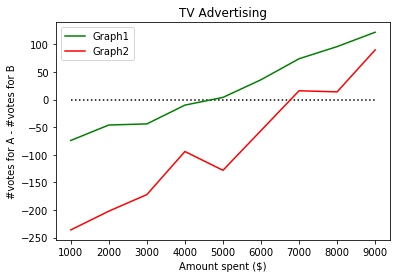


Q3:
On graph 1, the minimum amount you can spend to win is None
On graph 2, the minimum amount you can spend to win is 6000


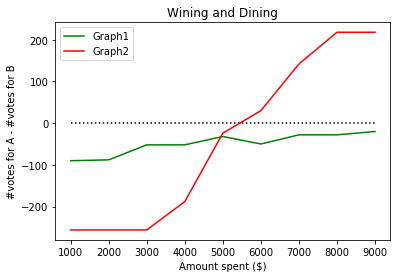


Q4:


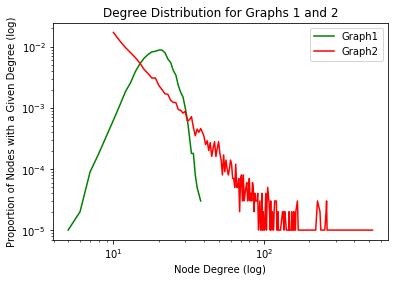

In [10]:
driver()

## Deliverables

Run your solved template(make sure all cell outputs are printed as required), convert it into pdf format, rename it to {gt_username}_hw3_q1_cse6240.pdf(e.g. pburdell3_hw3_q1_cse6240.pdf) Add both the .ipynb and .pdf file to the folder {gt_username}_hw3_cse6240, zip it and submit on canvas .[-5 if any instruction is not follwed properly]

{gt_username}_hw3_cse6240 >
1.   {gt_username}_hw3_q1_cse6240.ipynb
2.   {gt_username}_hw3_q1_cse6240.pdf

